100%|██████████| 6468/6468 [00:12<00:00, 535.99it/s]


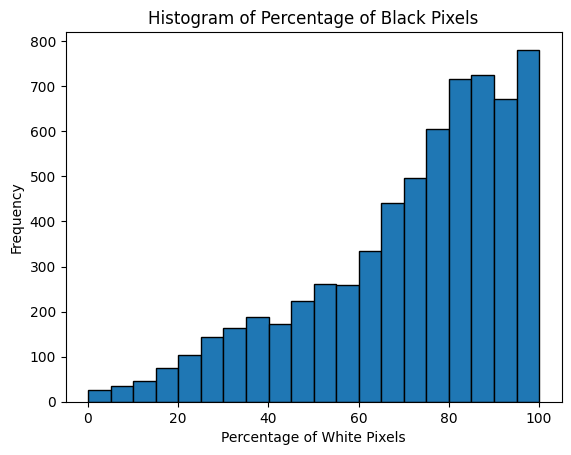

In [30]:
from PIL import Image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Directory containing the images
image_directory = "/home/miki/repos/uz/breakhis/vcs/data/400x/patches_with_random_stride/benign"

# Manually chosen threshold
manual_threshold = 200  # Adjust as needed

# Initialize a list to store the percentage of white pixels for each image
percentage_black_pixels_list = []
images_below_50 = []
images_above_50 = []

# Iterate through all files in the directory
for filename in tqdm(os.listdir(image_directory)):
    if filename.endswith(".png"):  # You can adjust the file extension as needed
        # Step 1: Load image with PIL
        image_path = os.path.join(image_directory, filename)
        image = Image.open(image_path)

        # Step 2: Convert it to grayscale
        gray_image = image.convert("L")

        # Step 2: Apply a manually chosen threshold
        _, thresholded_image = cv2.threshold(np.array(gray_image), manual_threshold, 255, cv2.THRESH_BINARY)

        # Step 3: Calculate percentage of white pixels
        total_pixels = thresholded_image.size
        white_pixels = np.sum(thresholded_image == 0)
        percentage_black_pixels = (white_pixels / total_pixels) * 100
        percentage_black_pixels_list.append(percentage_black_pixels)

        # Determine whether the image is below or above 50% threshold
        if percentage_black_pixels < 30:
            images_below_50.append(thresholded_image)
        elif percentage_black_pixels > 80:
            images_above_50.append(thresholded_image)

# Create a histogram of the percentages
plt.hist(percentage_black_pixels_list, bins=20, edgecolor='k')
plt.xlabel("Percentage of White Pixels")
plt.ylabel("Frequency")
plt.title("Histogram of Percentage of Black Pixels")
plt.show()


dupa


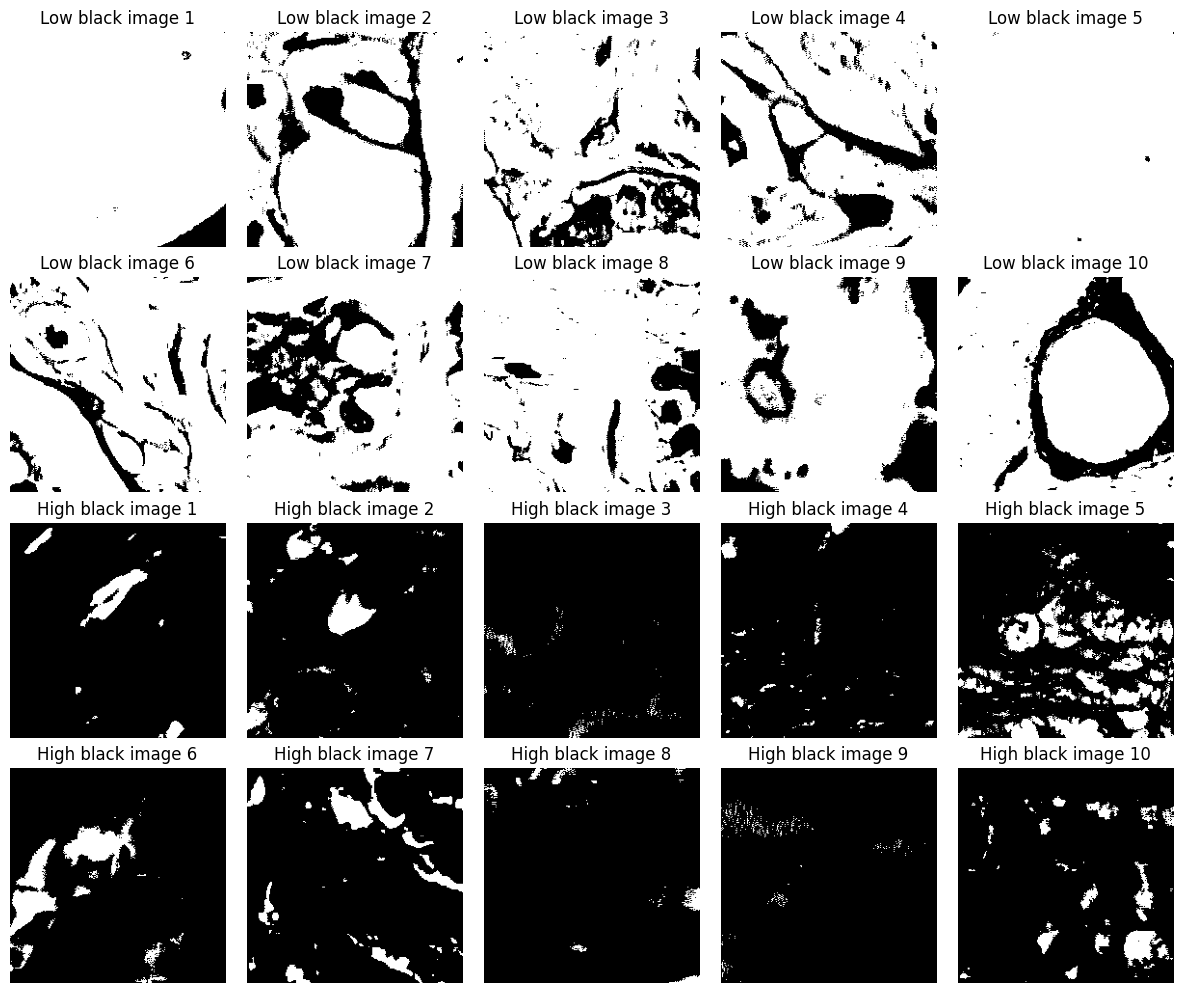

In [31]:
# Sort percentages and images by percentage
num_images_to_display_below = min(10, len(images_below_50))
num_images_to_display_above = min(10, len(images_above_50))

# Create a figure with subplots in a 4x5 grid
fig, axes = plt.subplots(4, 5, figsize=(12, 10))

# Display the selected images (below 50% threshold) in the grid
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        if index < num_images_to_display_below:
            axes[i, j].imshow(images_below_50[index], cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Low black image {index + 1}")

print("dupa")
# Display the selected images (above 50% threshold) in the grid
for i in range(2, 4):
    for j in range(5):
        index = (i * 5 + j) - 10
        if index < num_images_to_display_above:
            axes[i, j].imshow(images_above_50[index], cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f"High black image {index + 1}")

plt.tight_layout()
plt.show()

100%|██████████| 6468/6468 [00:11<00:00, 541.65it/s]


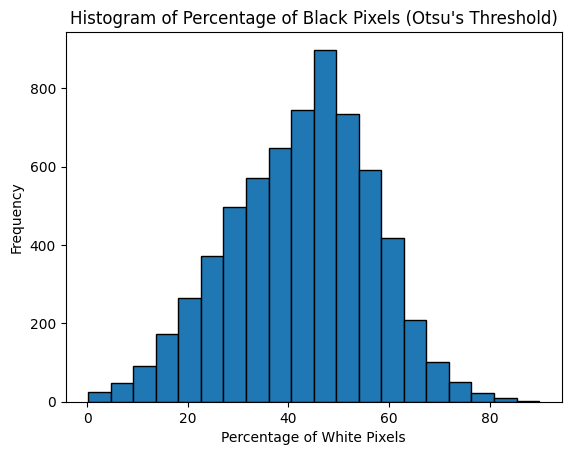

In [32]:
from PIL import Image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Directory containing the images
image_directory = "/home/miki/repos/uz/breakhis/vcs/data/400x/patches_with_random_stride/benign"

# Initialize a list to store the percentage of white pixels for each image
percentage_black_pixels_list = []
images_below_50 = []
images_above_50 = []

# Iterate through all files in the directory
for filename in tqdm(os.listdir(image_directory)):
    if filename.endswith(".png"):  # You can adjust the file extension as needed
        # Step 1: Load image with PIL
        image_path = os.path.join(image_directory, filename)
        image = Image.open(image_path)

        # Step 2: Convert it to grayscale
        gray_image = image.convert("L")

        # Step 2: Apply Otsu's thresholding using OpenCV
        image_np = np.array(gray_image)
        _, thresholded_image = cv2.threshold(image_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Step 3: Calculate percentage of white pixels
        total_pixels = thresholded_image.size
        black_pixels = np.sum(thresholded_image == 0)
        percentage_black_pixels = (black_pixels / total_pixels) * 100
        percentage_black_pixels_list.append(percentage_black_pixels)

        # Determine whether the image is below or above 50% threshold
        if percentage_black_pixels < 30:
            images_below_50.append(thresholded_image)
        elif percentage_black_pixels > 80:
            images_above_50.append(thresholded_image)

# Create a histogram of the percentages
plt.hist(percentage_black_pixels_list, bins=20, edgecolor='k')
plt.xlabel("Percentage of White Pixels")
plt.ylabel("Frequency")
plt.title("Histogram of Percentage of Black Pixels (Otsu's Threshold)")
plt.show()


dupa


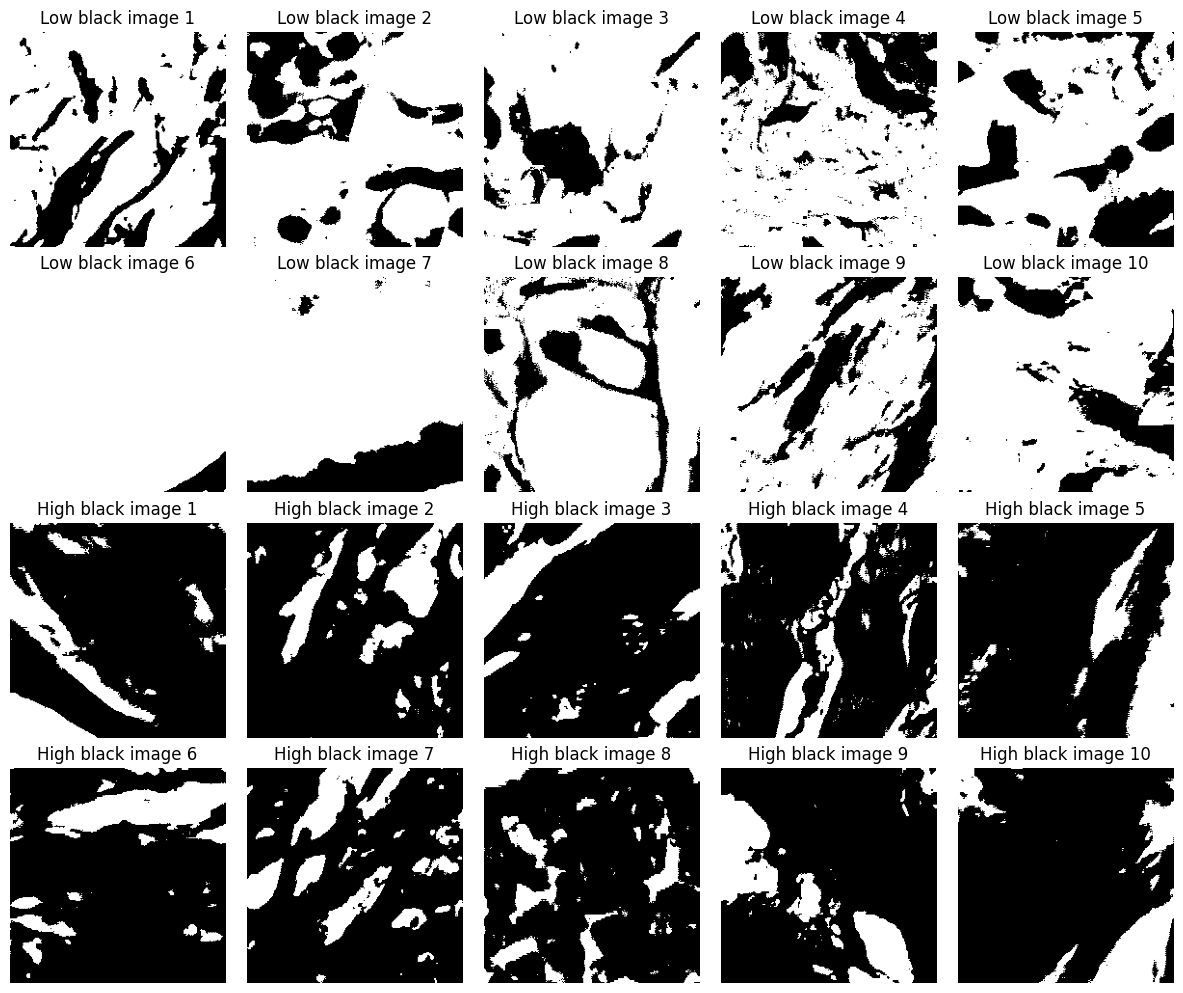

In [33]:
# Sort percentages and images by percentage
num_images_to_display_below = min(10, len(images_below_50))
num_images_to_display_above = min(10, len(images_above_50))

# Create a figure with subplots in a 4x5 grid
fig, axes = plt.subplots(4, 5, figsize=(12, 10))

# Display the selected images (below 50% threshold) in the grid
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        if index < num_images_to_display_below:
            axes[i, j].imshow(images_below_50[index], cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Low black image {index + 1}")

print("dupa")
# Display the selected images (above 50% threshold) in the grid
for i in range(2, 4):
    for j in range(5):
        index = (i * 5 + j) - 10
        if index < num_images_to_display_above:
            axes[i, j].imshow(images_above_50[index], cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f"High black image {index + 1}")

plt.tight_layout()
plt.show()
